# Implementation of LSTM on GME hourly data

## 1. importing required packages

In [3]:
pip install yfinance

     |████████████████████████████████| 5.5MB 8.1MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=2f2879a13df48668cbdc4d3879d95ebcf99a6409f8675cdd33dc21f5b9c26238
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
from keras.models import Sequential
from keras.layers import LSTM,Dropout,Dense
from sklearn.preprocessing import MinMaxScaler

## 2. importing stock data using yahoo! finance API

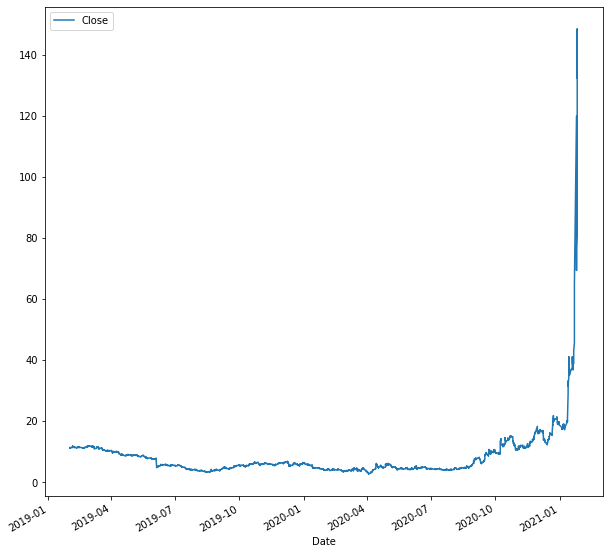

In [5]:
data = yf.download('GME', start = '2019-02-01', interval = '1h', end = '2021-01-27', progress = False)[['Close']]
data.head()
  
data.plot(figsize = (10, 10))

In [7]:
data.tail()

,Close
Date,
2021-01-26,112.010002
2021-01-26,122.190002
2021-01-26,148.380005
2021-01-26,136.360001
2021-01-26,132.330002


## 3. preparing dataset with 60:40 train-to-test ratio

In [8]:
prop_train = 0.6

cl = data.Close.astype('float32')
train = cl[0:int(len(cl)*prop_train)]
scl = MinMaxScaler()

In [9]:
scl.fit(train.values.reshape(-1,1))
cl = scl.transform(cl.values.reshape(-1,1))

In [10]:
def processData(data, lb):
    X,Y = [],[]
    for i in range(len(data)-lb-1):
        X.append(data[i:(i+lb), 0])
        Y.append(data[(i+lb), 0])
    return np.array(X), np.array(Y)
 
 
lb = 20
X, y = processData(cl,lb)
X_train,X_test = X[:int(X.shape[0]*prop_train)], X[int(X.shape[0]*prop_train):]
y_train,y_test = y[:int(y.shape[0]*prop_train)], y[int(y.shape[0]*prop_train):]

## 4. train the model, look back window = 20

In [11]:
#Build the model
model = Sequential()
model.add(LSTM(256,input_shape=(lb,1)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
 
#Reshape data for (Sample,Timestep,Features) 
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
 
#Fit model with history to check for overfitting
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_test,y_test),shuffle=False)
 
model.summary() 

Epoch 1/50
65/65 [==============================] - 10s 119ms/step - loss: 0.1069 - val_loss: 0.6675
Epoch 2/50
65/65 [==============================] - 7s 102ms/step - loss: 0.0072 - val_loss: 0.6460
Epoch 3/50
65/65 [==============================] - 7s 104ms/step - loss: 0.0059 - val_loss: 0.6065
Epoch 4/50
65/65 [==============================] - 7s 102ms/step - loss: 0.0034 - val_loss: 0.5757
Epoch 5/50
65/65 [==============================] - 6s 100ms/step - loss: 0.0017 - val_loss: 0.5686
Epoch 6/50
65/65 [==============================] - 6s 100ms/step - loss: 0.0015 - val_loss: 0.5760
Epoch 7/50
65/65 [==============================] - 7s 100ms/step - loss: 0.0020 - val_loss: 0.5849
Epoch 8/50
65/65 [==============================] - 7s 102ms/step - loss: 0.0026 - val_loss: 0.5917
Epoch 9/50
65/65 [==============================] - 7s 101ms/step - loss: 0.0031 - val_loss: 0.5929
Epoch 10/50
65/65 [==============================] - 7s 103ms/step - loss: 0.0032 - val_loss: 0.589

## 5. validation

Text(0.5, 1.0, 'Test Dataset')

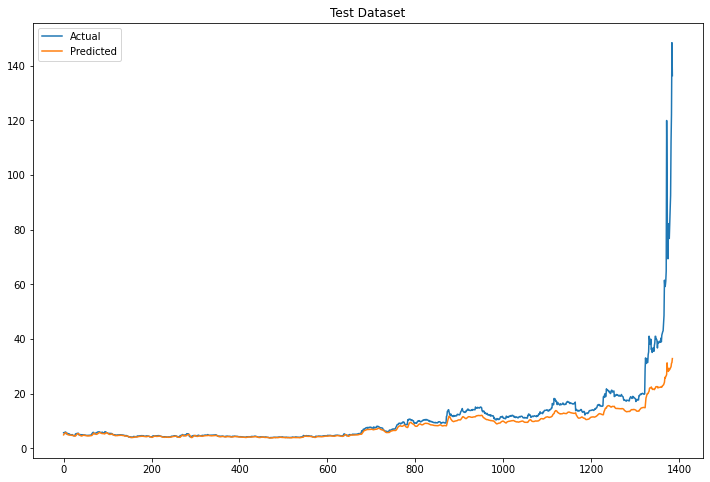

In [12]:
plt.figure(figsize=(12,8))
Xt = model.predict(X_test)
plt.plot(scl.inverse_transform(y_test.reshape(-1,1)), label="Actual")
plt.plot(scl.inverse_transform(Xt), label="Predicted")
plt.legend()
plt.title("Test Dataset")

Text(0.5, 1.0, 'Full Prediction')

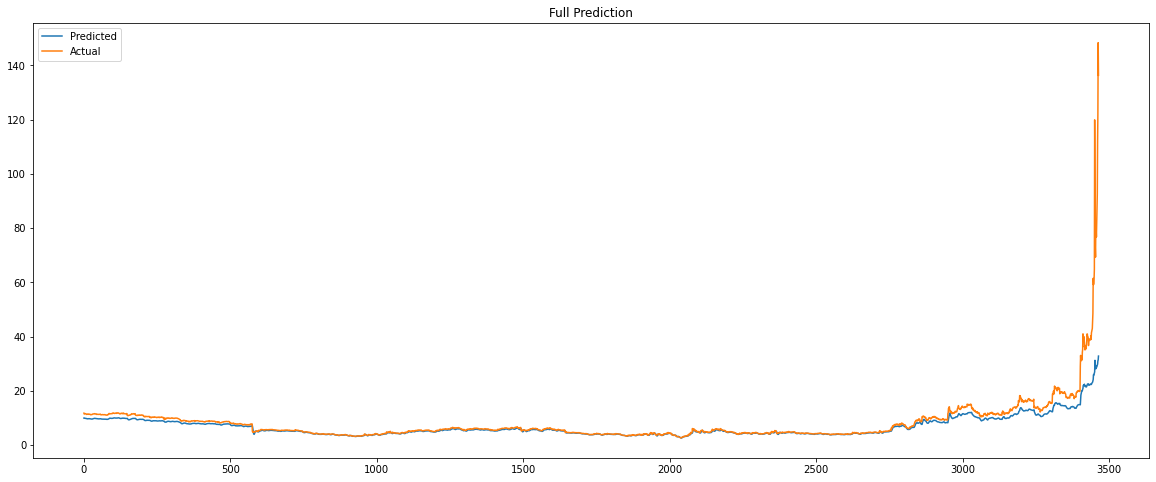

In [18]:
X = X.reshape((X.shape[0],X.shape[1],1))
y = y.reshape(-1,1)

plt.figure(figsize=(20,8))
Xp = model.predict(X)
plt.plot(scl.inverse_transform(Xp), label="Predicted")
plt.plot(scl.inverse_transform(y), label="Actual")
plt.legend()
plt.title("Full Prediction")

## 6. credit

### Source: 
> https://datamahadev.com/how-can-you-use-lstm-for-stock-market-prediction/<br>
> https://predictivehacks.com/predict-stock-prices-with-lstm/